<a href="https://colab.research.google.com/github/Madhav2204/Digital-Image-Processing-and-Pattern-Rcognition-/blob/main/p2_Intensity_Transformations_and_Spatial_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Experiment -02**

## **LOGARITHMIC TRANSFORMATION**
- Applies s = c * log(1 + r) transformation.
- Expands the value of dark pixels in an image.

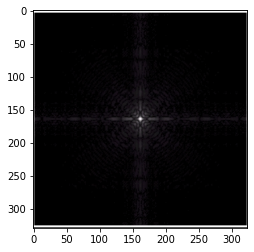

In [ ]:
import cv2 
import matplotlib.pyplot as plt 
import math
import numpy as np 
#this type of processing is suited for expanding dark pixels while compressing higher pixels

# Read an image 
image = cv2.imread('/content/drive/MyDrive/fourierspectrum.jpg') 
plt.imshow(image) 
plt.show()

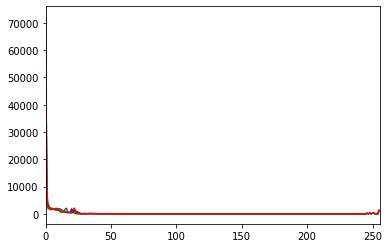

In [ ]:
# Histogram plotting of the image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
    histr = cv2.calcHist([image],  
                         [i], None, 
                         [256],  
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
      
    # Limit X - axis to 256 
    plt.xlim([0, 256]) 
      
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


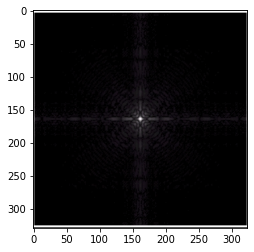

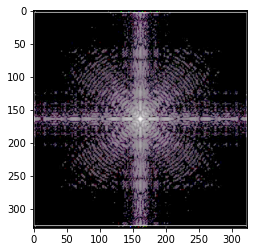

In [ ]:
# Apply log transformation method 
c = 255 / np.log(1 + np.max(image)) 
log_image = c * (np.log(image + 1)) 
   
# Specify the data type so that 
# float value will be converted to int 
log_image = np.array(log_image, dtype = np.uint8) 
   
# Display both images 
plt.imshow(image) 
plt.show() 
plt.imshow(log_image) 
plt.show() 

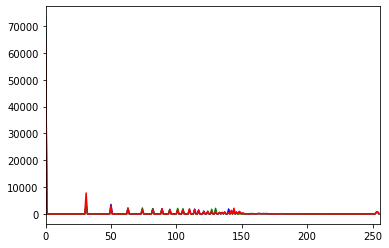

In [ ]:
 # Histogram plotting of the 
# log transformed image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([log_image],  
                         [i], None, 
                         [256], 
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
    plt.xlim([0, 256]) 
      
plt.show()

# PHOTOGRAPHIC NEGATIVE
The Photographic Negative is probably the easiest of the intensity transformations to describe. Assume that we are working with grayscale double arrays where black is 0 and white is 1. The idea is that 0's become 1's, 1's become 0's, and any gradients in between are also reversed. In intensity, this means that the true black becomes true white and vise versa

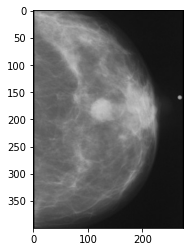

In [ ]:
import cv2 
import matplotlib.pyplot as plt 
  
#this type of processing is suited for enhancing white or gray detail embedded in dark regions of an image, especially when the black areas are dominant in size
# Read an image 
img_bgr = cv2.imread('/content/drive/MyDrive/breastcyst.jpg', 1) 
plt.imshow(img_bgr) 
plt.show() 

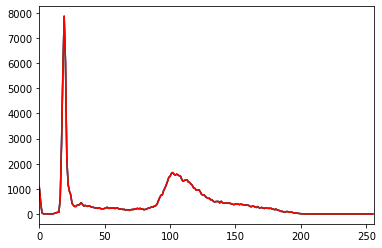

In [ ]:
# Histogram plotting of the image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([img_bgr],  
                         [i], None, 
                         [256],  
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
      
    # Limit X - axis to 256 
    plt.xlim([0, 256]) 
      
plt.show()

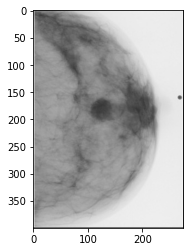

In [ ]:

# get height and width of the image 
height, width, _ = img_bgr.shape 
  
for i in range(0, height - 1): 
    for j in range(0, width - 1): 
          
        # Get the pixel value 
        pixel = img_bgr[i, j] 
          
        # Negate each channel by  
        # subtracting it from 255 
          
        # 1st index contains red pixel 
        pixel[0] = 255 - pixel[0] 
          
        # 2nd index contains green pixel 
        pixel[1] = 255 - pixel[1] 
          
        # 3rd index contains blue pixel 
        pixel[2] = 255 - pixel[2] 
          
        # Store new values in the pixel 
        img_bgr[i, j] = pixel 
  
# Display the negative transformed image 
#cancer detection 
plt.imshow(img_bgr) 
plt.show() 

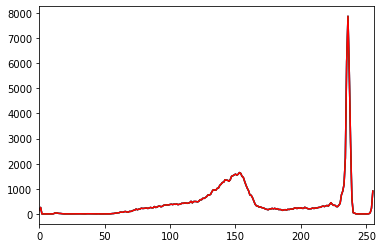

In [ ]:
# Histogram plotting of the 
# negative transformed image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([img_bgr],  
                         [i], None, 
                         [256], 
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
    plt.xlim([0, 256]) 
      
plt.show() 

## **Gamma transformation**
- Applies s = c * r^gamma transformation.
- Also called power-law transformation.
- Can be used to brighten or darken the image in non-linear fashion.


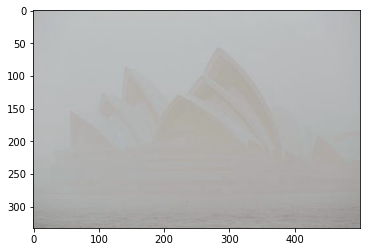

In [ ]:
#This type of processing is suited for displaying image correctly for human eye based on monitor's display settings

# Read an image 
image = cv2.imread('/content/drive/MyDrive/sydney.jpeg') 
plt.imshow(image) 
plt.show()

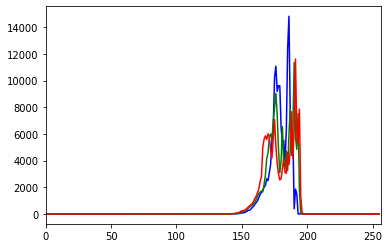

In [ ]:
# Histogram plotting of the image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([image],  
                         [i], None, 
                         [256],  
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
      
    # Limit X - axis to 256 
    plt.xlim([0, 256]) 
      
plt.show() 

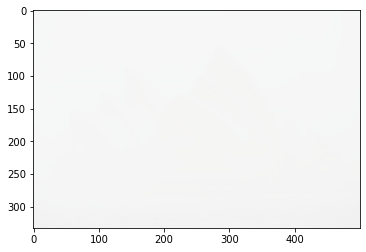

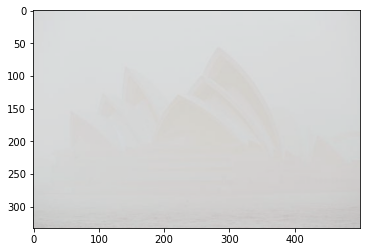

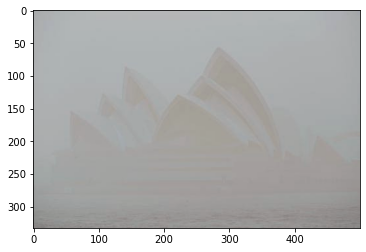

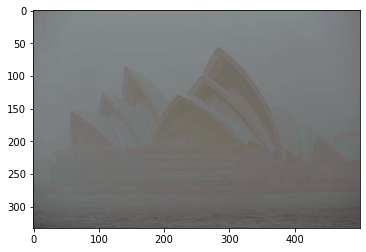

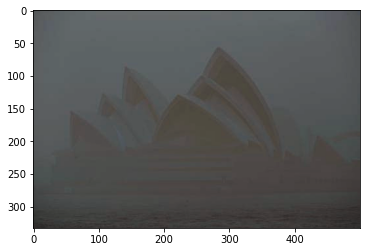

In [ ]:
# Trying 4 gamma values. 
for gamma in [0.1, 0.5, 1.2, 2.2, 3.2]: 

    # Apply gamma correction. 
    gamma_corrected = np.array(255*(image / 255) ** gamma, dtype = 'uint8') 
    plt.imshow(gamma_corrected) 
    plt.show() 

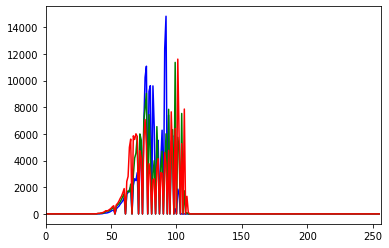

In [ ]:
# Histogram plotting of the 
# log transformed image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([gamma_corrected],  
                         [i], None, 
                         [256], 
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
    plt.xlim([0, 256]) 
      
plt.show()

### **Contrast stretching**
Expands the range of intensity levels in an image so that it spans the ideal full intensity range.

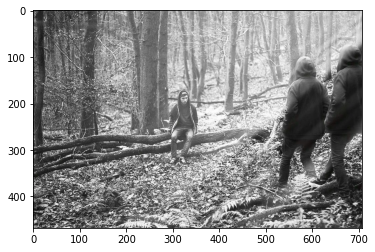

In [ ]:
'''
Contrast stretching (often called normalization) is a 
simple image enhancement technique that attempts to 
improve the contrast in an image by `stretching' 
the range of intensity values it contains 
to span a desired range of values,
e.g. the the full range of pixel values that the
image type concerned allows. 
It differs from the more sophisticated histogram equalization 
in that it can only apply a linear scaling function to the 
image pixel values. As a result the `enhancement' is less harsh. 
(Most implementations accept a graylevel image as input and produce another graylevel image as output.)
'''

# Read an image 
image = cv2.imread('/content/drive/MyDrive/forest.jpg') 
plt.imshow(image) 
plt.show()

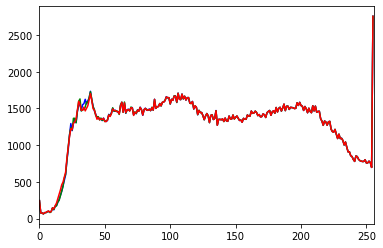

In [ ]:
# Histogram plotting of the image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([image],  
                         [i], None, 
                         [256],  
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
      
    # Limit X - axis to 256 
    plt.xlim([0, 256]) 
      
plt.show() 

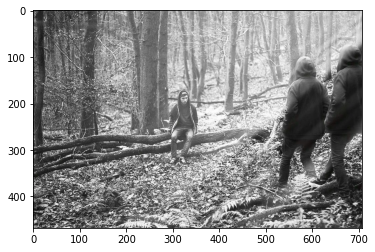

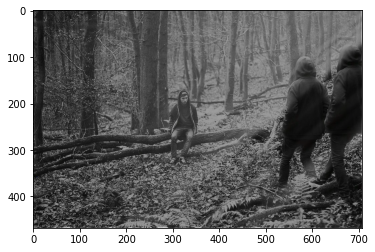

In [ ]:
# Apply contrast stretching method 
maxiI = 250
miniI = 3

maxoI = 155 
minoI = 0

stretched_image = image.copy()
# get height and width of the image 
height, width, _ = image.shape 
  
for i in range(0, height - 1): 
    for j in range(0, width - 1): 
          
        # Get the pixel value 
        pixel = stretched_image[i, j] 
          
        # scale each pixel by this formula
        '''
        pout = (pin - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
        
        '''
        
          
        # 1st index contains red pixel 
        pixel[0] = (pixel[0] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI  
          
        # 2nd index contains green pixel 
        pixel[1] = (pixel[1] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
          
        # 3rd index contains blue pixel 
        pixel[2] = (pixel[2] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
          
        # Store new values in the pixel 
        stretched_image[i, j] = pixel 
  

#original image
plt.imshow(image) 
plt.show()

#stretched image
plt.imshow(stretched_image) 
plt.show() 

## Histogram equalization
Improve image contrast by spreading intensities to all levels.

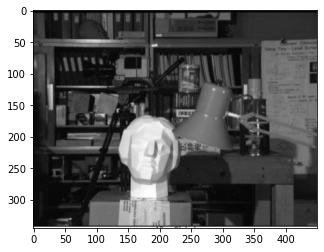

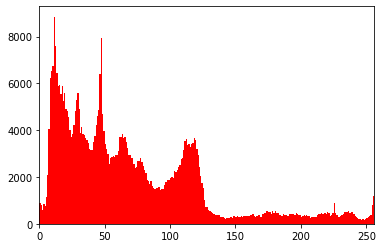

In [ ]:
img = cv2.imread('/content/drive/MyDrive/head.jpg')

# Display the images
plt.imshow(img) 
plt.show()

#display the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [ ]:
def histogram_equalization(img_in):

# segregate color streams
    b,g,r = cv2.split(img_in)
    
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
    
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
    
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
    
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
     
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out

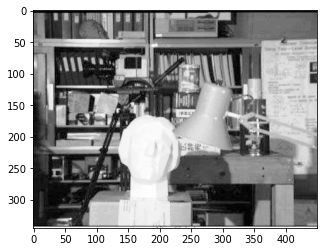

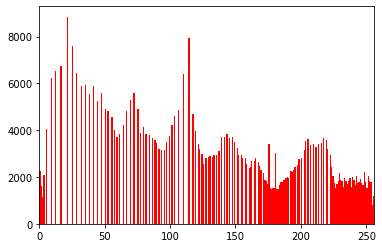

In [ ]:
img_out = histogram_equalization(img)

# Display the images
plt.imshow(img_out) 
plt.show()

#display the histogram
hist,bins = np.histogram(img_out.flatten(),256,[0,256])
plt.hist(img_out.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

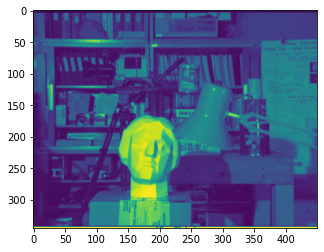

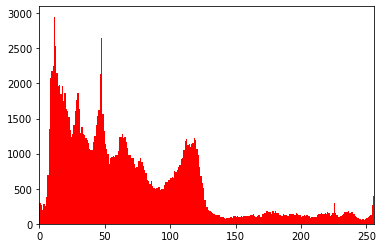

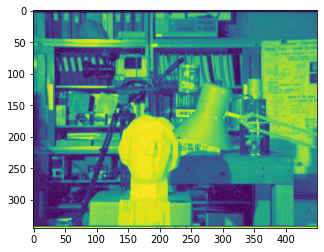

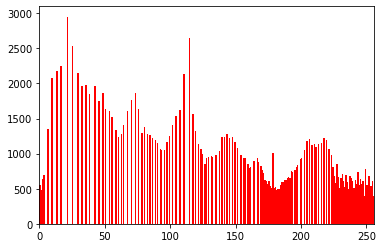

In [ ]:
#using opencv built-in function


img = cv2.imread('/content/drive/MyDrive/head.jpg', 0)

# Display the images
plt.imshow(img) 
plt.show()
#display histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

#histogram equalization
equ = cv2.equalizeHist(img)

#display image
plt.imshow(equ) 
plt.show()
#display histogram
hist,bins = np.histogram(equ.flatten(),256,[0,256])
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

#res = np.vstack((img,equ)) #stacking images side-by-side

## Histogram Matching (specification)
Mapping histogram of one image to histogram of another image.

In [ ]:
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1)
    # We need to mask the negative differences
    # since we are looking for values above
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c # returns min index of the nearest if target is greater than any value
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

In [ ]:
def hist_match(original, specified):

    oldshape = original.shape
    original = original.ravel()
    specified = specified.ravel()

    # get the set of unique pixel values and their corresponding indices and counts
    s_values, bin_idx, s_counts = np.unique(original, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(specified, return_counts=True)

    # Calculate s_k for original image
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    # Calculate s_k for specified image
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # Round the values
    sour = np.around(s_quantiles*255)
    temp = np.around(t_quantiles*255)
    
    # Map the rounded values
    b=[]
    for data in sour[:]:
        b.append(find_nearest_above(temp,data))
    b= np.array(b,dtype='uint8')

    return b[bin_idx].reshape(oldshape)

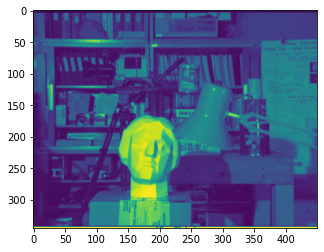

In [ ]:
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

# Load the images in greyscale
original = cv2.imread('/content/drive/MyDrive/head.jpg',0)
specified = cv2.imread('/content/drive/MyDrive/lady.jpg',0)

# perform Histogram Matching
a = hist_match(original, specified)
# Display the images
plt.imshow(original) 
plt.show()

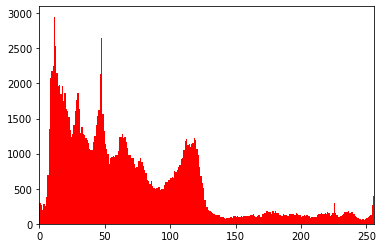

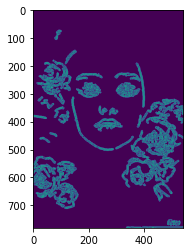

In [ ]:
#display the histogram
hist,bins = np.histogram(original.flatten(),256,[0,256])
plt.hist(original.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()
plt.imshow(specified) 
plt.show()

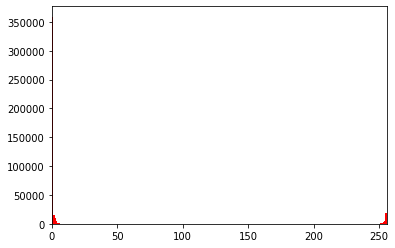

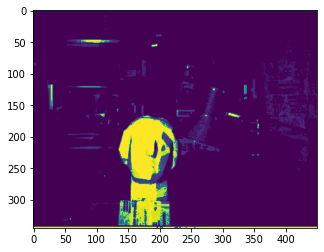

In [ ]:
#display the histogram
hist,bins = np.histogram(specified.flatten(),256,[0,256])
plt.hist(specified.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

plt.imshow(a) 
plt.show()

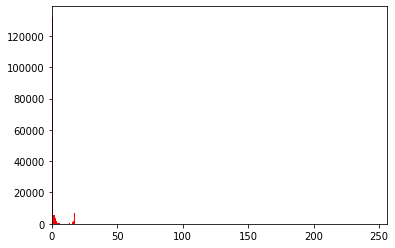

In [ ]:
#display the histogram
hist,bins = np.histogram(a.flatten(),256,[0,256])
plt.hist(a.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

## Blur — Low pass filters
Non-separable filters complexity — O(MNmn)
Separable filters complexity — O(MN(m+n))
Spatial correlation vs spatial convolution, convolution kernel pre-rotated by 180 degrees.
Isotropic kernel — circular symmetry — their response is independent of the orientation.
Gaussian kernel — only circular & separable filter.
Low pass filter — smoothening.
High pass filter — sharpening.

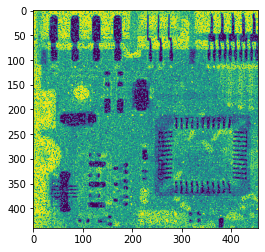

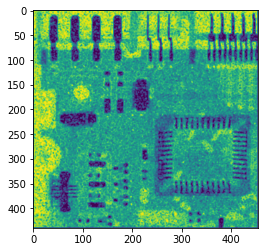

In [ ]:
# Low Pass SPatial Domain Filtering 
# to observe the blurring effect 

'''
Low Pass filtering: It is also known as the smoothing filter. 
It removes the high-frequency content from the image. 
It is also used to blur an image. 
A low pass averaging filter mask is as shown. 

1/9 1/9 1/9
1/9 1/9 1/9
1/9 1/9 1/9

'''

import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

	
# Read the image 
img = cv2.imread('/content/drive/MyDrive/board.png', 0) 

# Obtain number of rows and columns 
# of the image 
m, n = img.shape 

# Develop Averaging filter(3, 3) mask 
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9

# Convolve the 3X3 mask over the image 
img_new = np.zeros([m, n]) 

for i in range(1, m-1): 
	for j in range(1, n-1): 
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
		
		img_new[i, j]= temp 
		
img_new = img_new.astype(np.uint8) 


# Display the images
plt.imshow(img) 
plt.show()

# Display the images
plt.imshow(img_new) 
plt.show()

## Sharpening — High pass filter
Laplacian — 2nd order derivative
∇^2 f(x, y) = f(x + 1, y) + f(x - 1, y) + f(x, y + 1) + f(x, y - 1) - 4*f(x, y), ∇^2 f(x, y) is the Laplacian (2nd order derivative).
Kernel generated for this is isotropic for rotations in increment of 90 degrees.
Diagonal directions can be incorporated with following kernel.

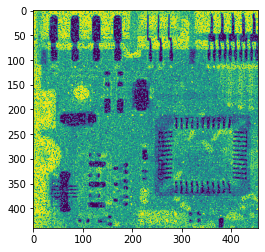

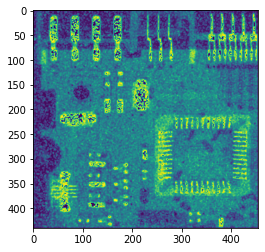

In [ ]:
# High Pass SPatial Domain Filtering 


'''
High Pass Filtering: It eliminates low-frequency regions 
while retaining or enhancing the high-frequency components. 
A high pass filtering mask is as shown.

-1/9 -1/9 -1/9
-1/9 8/9 -1/9
-1/9 -1/9 -1/9

'''

import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

	
# Read the image 
img = cv2.imread('/content/drive/MyDrive/board.png', 0) 

# Obtain number of rows and columns 
# of the image 
m, n = img.shape 

# Develop Averaging filter(3, 3) mask 
mask = np.ones([3, 3], dtype = int) 
mask = mask / -9

# Convolve the 3X3 mask over the image 
img_new = np.zeros([m, n]) 

for i in range(1, m-1): 
	for j in range(1, n-1): 
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
		
		img_new[i, j]= temp 
		
img_new = img_new.astype(np.uint8) 


# Display the images
plt.imshow(img) 
plt.show()

# Display the images
plt.imshow(img_new) 
plt.show()

## Sobel — 1st order derivative
∇f(x, y) = [∂f / ∂x, ∂f / ∂y] — this points in direction of the change of f at point (x, y).
Magnitude can be computed as ||∇f|| = sqrt(Gx * Gx + Gy * Gy).
Direction is given by theta = atan2(Gy / Gx)
Sobel and Feldman presented the idea of an “Isotropic 3x3 Image Gradient Operator” at a talk at SAIL in 1968, computes approximation of the gradient operator.

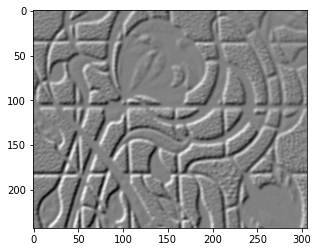

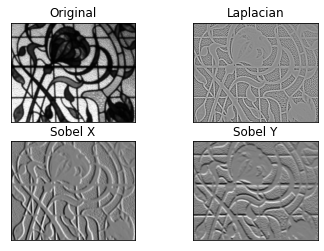

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

'''
Using two commonly used edge detection schemes - the gradient (Sobel - first order derivatives) based edge detector
and the Laplacian (2nd order derivative, so it is extremely sensitive to noise) based edge detector. 
Both of them work with convolutions and achieve the same end goal - Edge Detection.
'''

# loading image
#img0 = cv2.imread('SanFrancisco.jpg',)
img0 = cv2.imread('/content/drive/MyDrive/windows.jpg',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

sobel_img = sobelx + sobely 

# Display the soble image
plt.imshow(sobel_img, cmap = 'gray') 
plt.show()
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

## **Submitted By : Madhav Shrivastava**

## **Enroll no.   : 19100BTCSBS05597**